# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [141]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = '/Users/michelecavaioni/Flatiron/My-Projects/Udacity (Self Driving Car)/Project #2 (Traffic Signs Recognition)/traffic-signs-data/train.p'
testing_file = '/Users/michelecavaioni/Flatiron/My-Projects/Udacity (Self Driving Car)/Project #2 (Traffic Signs Recognition)/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [142]:
### To start off let's do a basic data summary.

#use this one when doing "np_utils.to_categorical":
#from keras.utils import np_utils 

# TODO: number of training examples
n_train = len(X_train)

# TODO: number of testing examples
n_test = len(X_test)

# TODO: what's the shape of an image?
image_shape = X_train[0].shape

# TODO: how many classes are in the dataset
import numpy as np
n_classes = len(np.unique(y_train))

#I could also use this one. which will be needed later on:
# n_classes = (np_utils.to_categorical(y_train)).shape[1]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


These are 16 images from the test dataset


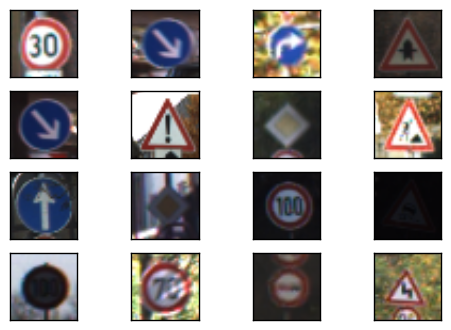

##########

Count and plot each sign in the training data (key is the label value):
Counter({2: 2250, 1: 2220, 13: 2160, 12: 2100, 38: 2070, 10: 2010, 4: 1980, 5: 1860, 25: 1500, 9: 1470, 7: 1440, 3: 1410, 8: 1410, 11: 1320, 18: 1200, 35: 1200, 17: 1110, 14: 780, 31: 780, 33: 689, 15: 630, 26: 600, 28: 540, 23: 510, 30: 450, 6: 420, 16: 420, 34: 420, 22: 390, 36: 390, 20: 360, 40: 360, 21: 330, 39: 300, 24: 270, 29: 270, 27: 240, 32: 240, 41: 240, 42: 240, 0: 210, 19: 210, 37: 210})



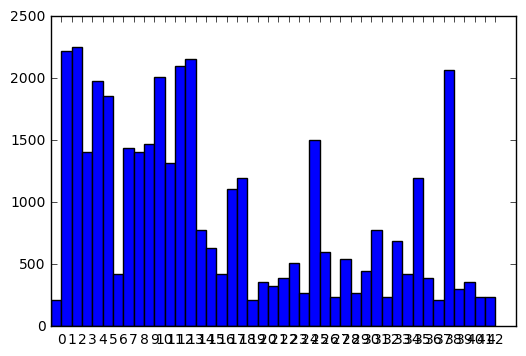

##########

First instance of each unique sign found in the training set:


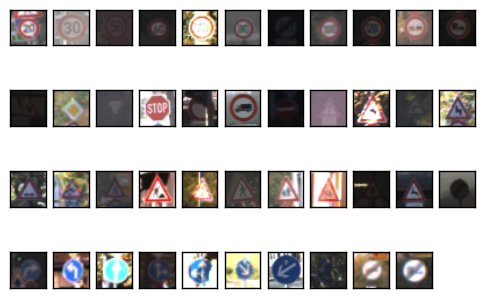

In [143]:
### Data exploration visualization goes here.
import numpy as np
# plotting the first 16 signs included in the test dataset:
import matplotlib.pyplot as plt
print("These are 16 images from the test dataset")
nrows, ncols = 4, 4
fig = plt.figure()    
for i in range(1,17):
    ax = fig.add_subplot(nrows, ncols, i)
    ax.imshow(X_test[i])
    plt.xticks(())
    plt.yticks(())
plt.show()

print("##########")
print()

# print all the labels as keys and their related count, within the training set:
print("Count and plot each sign in the training data (key is the label value):")
import collections
a=collections.Counter(y_train)
print(a)

print()

#plotting the labels "count":
from collections import Counter
labels, values = zip(*Counter(y_train).items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width, labels)
plt.show()

print("##########")
print()

# plotting the first instance found on the training set for each unique value of the labels:
print("First instance of each unique sign found in the training set:")
nr, nc = 4, 11
fig1 = plt.figure()    
for i in range(len(np.unique(y_train))):
    ax = fig1.add_subplot(nr, nc, i+1)
    list_of_indexes=np.where(y_train==i)
    first = list_of_indexes[0][0]
    ax.imshow(X_train[first])
    plt.xticks(())
    plt.yticks(())
plt.show()

### ----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [144]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

#transforming images from rgb to grayscale:
import cv2
def grayscale(image):
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image_gray

X_train_gray=[]
for i in range(len(X_train)):
    X_train_gray.append(grayscale(X_train[i]))
X_train_gray = np.array(X_train_gray)
X_train_gray = X_train_gray[:,:,:,np.newaxis]

X_test_gray=[]
for i in range(len(X_test)):
    X_test_gray.append(grayscale(X_test[i]))
X_test_gray = np.array(X_test_gray)
X_test_gray = X_test_gray[:,:,:,np.newaxis]

#normalizing image data:
def normalize_greyscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    """
    a=0.1
    b=0.9
    x_min = 0
    x_max =255   
    return (a + (((image_data)*(b-a))/(x_max-x_min)))

X_train_norm = normalize_greyscale(X_train_gray)

X_test_norm = normalize_greyscale(X_test_gray)


### Question 1 

_Describe the techniques used to preprocess the data._

The first method I have used is transforming the images from rgb (color) to grayscale, in order to reduce the number of features (by a mesure of 3).

Later on I implement normalization on those data using min-max scaling. This allows to rescale the inputs to a mean equal to zero and with small variance. Doing this will help Gradient Descent to better proceed in optimizing the weights and bias so to reach the smallest loss value faster.

In [145]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.

from sklearn.cross_validation import train_test_split

X_train_fin, X_val, y_train_fin, y_val = train_test_split(X_train_norm, y_train, test_size=0.05, random_state=42)

from keras.utils import np_utils

y_train_fin = np_utils.to_categorical(y_train_fin)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)


### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

In [134]:
### Define your architecture here.
I used the X_train_norm (normalized grascale data images) as inputs and I split the dataset into a training set (X_train)
and a validation set (X_val). The validation set is 5% of the total dataset. 
"train_test_split" in "sklearn" also randomly selects the split, which is great in this scenario as similar images are 
put in sequential order.
I also set a random_state to keep this in memory.

The validation set is going to be used to test the performance of the algorithm, while keeping the test set "clean" and "hidden" from the learning algorithm, so there is no 
"spilled" information that can affect the test dataset.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


The model that I implemented is a linear classifier that can be represented with teh schema below:

X --> X*W + b --> y ---> S(y) --> L 

In details, X are the inputs, which are images of 32x32 pixels (since the number of color channels is 1, as the images have been transformed to gray)

where: x are the inputs, which in our case are 32*32 pixels (since the number of color channels is 1, as the images have been transformed to gray).So the input size is 1024 (32*32*1).
The logistic classifier applies a linear function in order to generate predictions.
The linear function is defined as X*W + b, where W=weights and b=bias. The linear function is the "layer" between the input data (X) and the output (y).
W, the weights has size 44,032 (1024 for the input data * 43 for the output classes).
b, the bias has size 43.
In total, the number of parameters in this netwrok are: 44,075 (1024*43 + 43).
The weights and the bias get modified each iteration depending on how close to the real output the prediction was.
The prediction is calculated using the "softmax" function, which turns the scores into probabilities.
Then we compute the "cross-entropy" and we minimize it. The cross-entropy can be interpret as the distance between the labels and the scores probability. Minimizing the cross-entropy means having a low distance when the class predicted is correct and a high distance otherwise.
Finally, y is in fact the scores and S(y) the probabilities. 
These get compared to L which is the set of labels (43 in this case). The labels get transformed using "one-hot-encoding" in order to create a single vector for each class, composed by all zeros except for 1 where the class corresponds to the index.



Epoch 100/100: 100%|██████████| 373/373 [00:03<00:00, 112.89batches/s]


model saved in file: /tmp/model.ckpt
Validation accuracy at 0.819989800453186


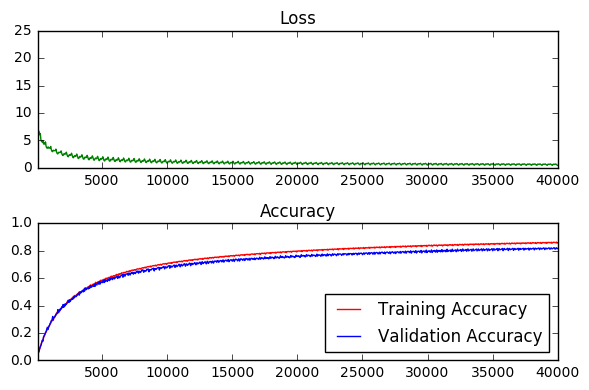

In [164]:
### Train your model here.
import tensorflow as tf
import math
from tqdm import tqdm
import matplotlib.pyplot as plt

y_train_fin = y_train_fin.astype(np.float32)
y_val = y_val.astype(np.float32)
y_test = y_test.astype(np.float32)

X_train_fin = X_train_fin.astype(np.float32)
X_test_norm = X_test_norm.astype(np.float32)


# Parameters
epochs = 100
batch_size = 100
learning_rate = 0.1

n_input = 1024  # data input (img shape: 32*32)
n_classes = 43  # total classes 
n_train_fin = len(X_train_fin)
n_labels_fin = len(y_train_fin)

X_train_fin = X_train_fin.reshape([-1, n_input])
X_val = X_val.reshape([-1, n_input])
X_test_norm = X_test_norm.reshape([-1, n_input])


x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)


weights = tf.Variable(tf.truncated_normal((n_input, n_classes)))
biases = tf.Variable(tf.zeros(n_classes))

y_conv = tf.add(tf.matmul(x, weights), biases)

prediction = tf.nn.softmax(y_conv)

# Cross entropy
# cross_entropy = -tf.reduce_sum(y * tf.log(prediction), reduction_indices=1)
# Training loss
# cost = tf.reduce_mean(cross_entropy)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y_conv, y))
# cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(tf.nn.softmax(y_conv)), reduction_indices=1))
       
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Create an operation that initializes all variables
init = tf.initialize_all_variables()


train_feed_dict = {x: X_train_fin, y: y_train_fin}
valid_feed_dict = {x: X_val, y: y_val}
test_feed_dict = {x: X_test_norm, y: y_test}

saver = tf.train.Saver()

# Train and Validation Cases
with tf.Session() as session:
    session.run(init)
    session.run(cost, feed_dict=train_feed_dict)
    session.run(cost, feed_dict=valid_feed_dict)
    # session.run(cost, feed_dict=test_feed_dict)
    biases_data = session.run(biases)

    is_correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y, 1))
    # Calculate the accuracy of the predictions
    accuracy = tf.reduce_mean(tf.cast(is_correct_prediction, tf.float32))

# The accuracy measured against the validation set
validation_accuracy = 0.0

# Measurements use for graphing loss and accuracy
log_batch_step = 50
batches = []
loss_batch = []
train_acc_batch = []
valid_acc_batch = []

with tf.Session() as session:
    session.run(init)
    batch_count = int(math.ceil(len(X_train_fin)/batch_size))

    for epoch_i in range(epochs):
        
        # Progress bar
        batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')
        
        # The training cycle
        for batch_i in batches_pbar:
            # Get a batch of training features and labels
            batch_start = batch_i*batch_size
            batch_features = X_train_fin[batch_start:batch_start + batch_size]
            batch_labels = y_train_fin[batch_start:batch_start + batch_size]

            # Run optimizer and get loss
            _, l = session.run(
                [optimizer, cost],
                feed_dict={x: batch_features, y: batch_labels})

            # Log every 50 batches
            if not batch_i % log_batch_step:
                # Calculate Training and Validation accuracy
                training_accuracy = session.run(accuracy, feed_dict=train_feed_dict)
                validation_accuracy = session.run(accuracy, feed_dict=valid_feed_dict)

                # Log batches
                previous_batch = batches[-1] if batches else 0
                batches.append(log_batch_step + previous_batch)
                loss_batch.append(l)
                train_acc_batch.append(training_accuracy)
                valid_acc_batch.append(validation_accuracy)

        # Check accuracy against Validation data
        validation_accuracy = session.run(accuracy, feed_dict=valid_feed_dict)
    #saving the traine model:
    save_path = saver.save(session, "/tmp/model.ckpt")
    print("model saved in file: %s" % save_path)
print('Validation accuracy at {}'.format(validation_accuracy))

loss_plot = plt.subplot(211)
loss_plot.set_title('Loss')
loss_plot.plot(batches, loss_batch, 'g')
loss_plot.set_xlim([batches[0], batches[-1]])
acc_plot = plt.subplot(212)
acc_plot.set_title('Accuracy')
acc_plot.plot(batches, train_acc_batch, 'r', label='Training Accuracy')
acc_plot.plot(batches, valid_acc_batch, 'b', label='Validation Accuracy')
acc_plot.set_ylim([0, 1.0])
acc_plot.set_xlim([batches[0], batches[-1]])
acc_plot.legend(loc=4)
plt.tight_layout()
plt.show()

In [165]:
test_accuracy = 0.0

with tf.Session() as session:
    session.run(init)
    saver.restore(session, "/tmp/model.ckpt")
    print("Model restored.")
    is_correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(is_correct_prediction, tf.float32))

    test_accuracy = session.run(accuracy, feed_dict=test_feed_dict)


print('Done! Test Accuracy is {}'.format(test_accuracy))

Model restored.
Done! Test Accuracy is 0.7493270039558411


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


The above neural network is a very simple one, as it consists of a linear logistic classifier, with no convolutions.
The optimizer is a Stochastic Gradient Descent, which is minimizing the cost function in order to optimize the weights.
I have ran the model with few epochs (10) and noticed that the loss function kept decreasing, therefore I increased the number of epochs to 1000.I plotted the validation accuracy line against the steps (batches*epochs). I stopped increasing the epochs when I saw that the validation accuracy curve was remaining flat. (Reaching a value of 90.2%)
[here I ran only 100 epochs due to time constraint as I am using only CPU].
Initially the learning rate was very low (0.001), but I had better imporvement with a higher learning rate of 0.1.
I set the batch size at 100, so the model trains on a total of 263 batches and the run time is fairly quick (around 3 seconds per epoch).
The biases have been initially set to zero.
The weights are set to values that follow a normal distribution with zero mean and 1.0 standard deviation.
The model is training on the training set but testing on the validation set in order to avoid any type of "learning" that might affect the model, when evalutating the test set.
Once I achieve the best validation accuracy, I use that saved model to run on the test set.


### Question 5


_What approach did you take in coming up with a solution to this problem?_

In the preprocessing phasy I first wanted to "clean" the input data, redducing the number of features. That prompted to transform the images into greyscale. Furthermore I needed to normalize the features for the training and test data so to have well conditioned data and allow the SGD to optimize faster.
Setting up a logistic classifier was a matter of following the scheme below:

x --> x*W + b --> y ---> S(y) --> one-hot-encoded labels

where:
x are the inputs, which in our case are 32*32 pixels (since the number of color channels is 1, as the images have been transformed to gray).
y is instead the number of labels which are 43.

Once the inputs are set correctly I split them in batches which were fed to the classifier during the training cycle.

The model is evaluated against the accuracy, which measures how many predictions were corresponding to the correct labels.


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

These are 11 images taken from the web


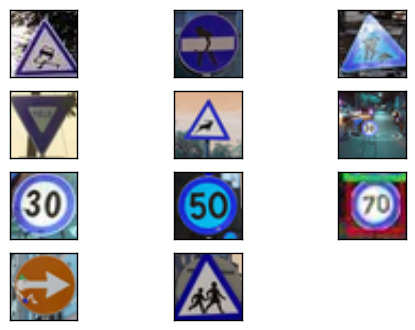

In [166]:
### Load the images and plot them here.
import glob, os
import cv2, numpy

path = '/Users/michelecavaioni/Flatiron/My-Projects/Udacity (Self Driving Car)/Project #2 (Traffic Signs Recognition)/traffic_sign_images/32x32pix/'

image_dict = []
for i,infile in enumerate(glob.glob(os.path.join(path,'*.png'))):
    img = cv2.imread(infile)            
    image_dict.append(img)
image_dict = np.array(image_dict)    

import numpy as np
# plotting the images:
import matplotlib.pyplot as plt
print("These are 11 images taken from the web")
nrows, ncols = 4, 3
fig = plt.figure()    
for i in range(len(image_dict)):
    ax = fig.add_subplot(nrows, ncols, i+1)
    ax.imshow(image_dict[i])
    plt.xticks(())
    plt.yticks(())
plt.show()

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



These are the 5 chosen images


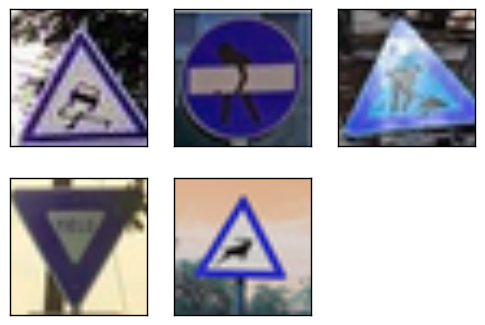

In [167]:
import numpy as np
# plotting the images:
import matplotlib.pyplot as plt
print("These are the 5 chosen images")
nrows, ncols = 2, 3
fig = plt.figure()    
for i in range(0,5):
    ax = fig.add_subplot(nrows, ncols, i+1)
    ax.imshow(image_dict[i])
    plt.xticks(())
    plt.yticks(())
plt.show()

I chose these 5 images as the resolution is not very good in all of them and one is particularly bright, which might make classification more challenging.
Furthermore the second one has some "graffiti" on it which disturbs the traffic sign.

In [168]:
### Run the predictions here.
image_dict=image_dict[0:5]
image_dict = np.array(image_dict)

X_test_new_gray=[]
for i in range(len(image_dict)):
    X_test_new_gray.append(grayscale(image_dict[i]))
X_test_new_gray = np.array(X_test_new_gray)
X_test_new_gray = X_test_new_gray[:,:,:,np.newaxis]

X_test_new = normalize_greyscale(X_test_new_gray)

y_test_new = np.array([30, 17, 25, 13, 31])

y_test_new = np_utils.to_categorical(y_test_new)
new_y = []
for i in range(len(y_test_new)):
  single = np.append(y_test_new[i], [0,0,0,0,0,0,0,0,0,0,0])
  new_y.append(single)
y_test_new = np.array(new_y)

import tensorflow as tf

y_test_new = y_test_new.astype(np.float32)

X_test_new = X_test_new.reshape([-1, n_input])
X_test_new = X_test_new.astype(np.float32)

#######

test_accuracy_new = 0.0
# tf.reset_default_graph()
with tf.Session() as session:
    session.run(init)
    saver.restore(session, "/tmp/model.ckpt")
    print("Model restored again.")

    is_correct_prediction_new = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y, 1))
    accuracy_new = tf.reduce_mean(tf.cast(is_correct_prediction_new, tf.float32))

    test_accuracy_new = session.run(accuracy_new, feed_dict={x: X_test_new, y: y_test_new})
    
print('Done! Test Accuracy is {}'.format(test_accuracy_new))

Model restored again.
Done! Test Accuracy is 0.4000000059604645


### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


No, the model is performing much poorly when compared to previous performance on the given test set. (only 40% of test accuracy). 
I was expecting this result as also on the test set the accuracy wasn't that great.
Generating additional data could be a good idea due to the unbalanced nature of the dataset. This will help make up for the classes with lower number of signs compared to the others and also increase your dataset size.

In [169]:
### Visualize the softmax probabilities here.

with tf.Session() as session:
    session.run(init)
    p = prediction.eval(feed_dict={x: X_test_new})
    print("predictions", p)
    

predictions [[  1.49015254e-13   1.28163412e-15   1.01452999e-04   2.63947780e-10
    9.06480757e-09   5.86454974e-23   1.05248746e-15   1.38514647e-02
    1.35789423e-17   9.78075178e-14   1.55700571e-17   1.94247905e-03
    6.60387627e-07   1.39646378e-31   7.12957037e-13   2.46652809e-09
    6.57382415e-08   4.60409092e-21   1.35559421e-05   3.15348805e-19
    2.15750326e-17   3.86301069e-20   5.13918641e-09   9.59742129e-01
    8.69156720e-18   2.50094064e-12   8.06889210e-18   7.98257483e-21
    8.12519289e-20   9.48194406e-18   1.01126321e-17   2.42778268e-02
    1.23192984e-10   6.97567593e-05   2.00762008e-23   1.39085074e-07
    1.96232454e-17   2.71819872e-10   4.66720024e-07   1.14673213e-08
    1.80204689e-20   2.07052014e-11   2.20476653e-12]
 [  4.08115408e-09   1.18168305e-11   7.33022659e-07   4.85757035e-08
    1.32064440e-06   6.91007852e-14   1.59519845e-11   1.72726728e-03
    1.58380449e-12   7.26526173e-10   8.43145540e-13   8.11359107e-01
    1.57510527e-07   2.4

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


In [174]:
# labels = tf.argmax(y_test, 1)
# y_test = np.array([30, 17, 25, 13, 31])
with tf.Session() as session:
    session.run(init)
    y_conv = tf.add(tf.matmul(X_test_new, weights), biases)
    values, indices = session.run(tf.nn.top_k(y_conv,10))
    print(values)
    print(indices)


[[ 46.41724014  39.84638214  29.64979553  22.8570652   21.12394714
   19.82788086  19.50082397  19.16109848  18.66298485  16.06815147]
 [ 39.53769684  17.02161026  16.84637451  15.49325657  13.21855164
   11.69716835  10.4145031    9.86452484   9.41278267   8.46681404]
 [ 48.98419189  36.94498825  25.52486801  25.29412651  22.20809937
   17.84782028  17.45109749  16.78971863  15.52714729  13.71671391]
 [ 67.19685364  23.78796387  22.59997177  21.33213043  20.771698
   19.92369461  18.04481697  17.12158203  16.55491638  16.09636497]
 [ 56.65353775  26.32457161  24.64299965  23.14932632  22.65598297
   22.11874962  17.53357697  14.11330223  13.95497704  12.9796629 ]]
[[ 2 15  8 42 22 16 19  4 27 26]
 [ 2  8 31 22 26 42 15 35 37 20]
 [ 2 42  8 15 31 37 18 39 27 20]
 [ 2 37 26  8 15  6 42 12 24 16]
 [ 2 31 37  8 42 15 35 27 19 12]]


Printing the prediction using a k=10 it shows how poorly the predictions are. For the first 4 samples in fact the prediction was not even in the top 10. Only the last sample appeared in the top 10 as a second prediction, showing that the model was more confident about this result.

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


As shown previously (question 6) the images were acquired through this:
import glob, os
import cv2, numpy

path = '/Users/michelecavaioni/Flatiron/My-Projects/Udacity (Self Driving Car)/Project #2 (Traffic Signs Recognition)/traffic_sign_images/32x32pix/'

image_dict = []
for i,infile in enumerate(glob.glob(os.path.join(path,'*.png'))):
    img = cv2.imread(infile)            
    image_dict.append(img)
image_dict = np.array(image_dict) 

Out of these 11 images I picked the first five of them. For the labels I manually assigned the values, comparing the image with the description/values from the signnames.csv 
file:https://github.com/udacity/traffic-signs/blob/master/signnames.csv

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.